### CIFAR-10 Object Recognition in Images using Convolutional Neural Networks

In this notebook, we will train a Convolutional Neural Network (CNN) to classify images from the CIFAR-10 dataset. The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. The dataset can be downloaded from [Kaggle](
https://www.kaggle.com/c/cifar-10/).


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [3]:
# Get the shapes and sizes of the datasets
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


50,000 training images and 10,000 test images are provided in the dataset. The images are divided into 10 classes. The 10 different classes represent airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks. The images are 32x32 pixels in size and are RGB.

10,000 test images are provided in the dataset.

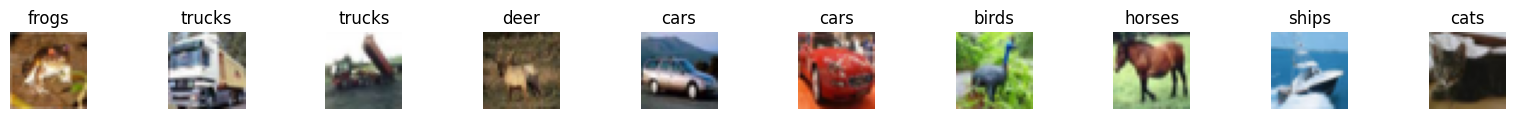

In [4]:
# Map the label to the class name
class_names = ['airplanes', 'cars', 'birds', 'cats', 'deer', 'dogs', 'frogs', 'horses', 'ships', 'trucks']
# visualize the first 10 images
plt.figure(figsize=(20, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i, 0]])
    plt.axis("off")
plt.show()

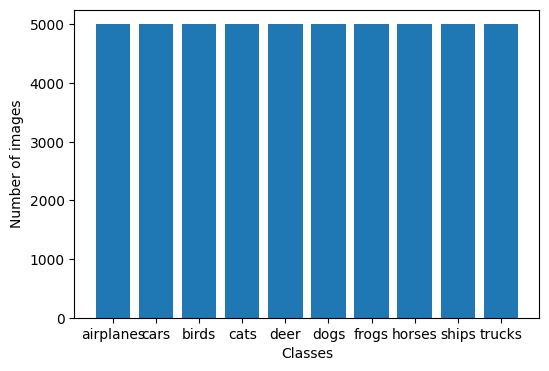

In [5]:
# Number of images in each class
unique, counts = np.unique(y_train, return_counts=True)
# plot the number of images in each class
plt.figure(figsize=(6, 4))
plt.bar(class_names, counts)
plt.xlabel('Classes')
plt.ylabel('Number of images')
plt.show()

In [6]:
# Scale the pixel values of the images to the 0 to 1 range
x_train = x_train / 255.0
x_test = x_test / 255.0
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)

x_train shape: (50000, 32, 32, 3)
x_test shape: (10000, 32, 32, 3)


In [7]:
# # create a cnn model for CIFAR-10
model = keras.Sequential([
    keras.layers.Input(shape=(32, 32, 3)),
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10)
])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=15, validation_data=(x_test, y_test))

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 21ms/step - accuracy: 0.3456 - loss: 1.7596 - val_accuracy: 0.5379 - val_loss: 1.2842
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - accuracy: 0.5669 - loss: 1.2130 - val_accuracy: 0.6062 - val_loss: 1.1175
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - accuracy: 0.6391 - loss: 1.0273 - val_accuracy: 0.6501 - val_loss: 0.9986
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.6776 - loss: 0.9157 - val_accuracy: 0.6672 - val_loss: 0.9377
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.7085 - loss: 0.8201 - val_accuracy: 0.6871 - val_loss: 0.9058
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - accuracy: 0.7286 - loss: 0.7732 - val_accuracy: 0.7036 - val_loss: 0.8592
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.7445 - loss: 0.7295 - val_accuracy: 0.7076 - val_loss: 0.8420
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - accuracy: 0.7607 -

313/313 - 2s - 7ms/step - accuracy: 0.7109 - loss: 0.9526
Test accuracy: 0.7109000086784363


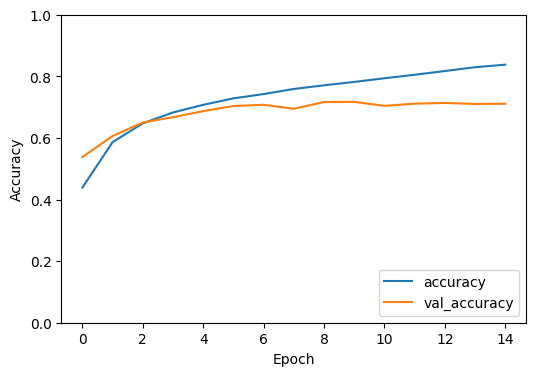

In [9]:
plt.figure(figsize=(6, 4))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("Test accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


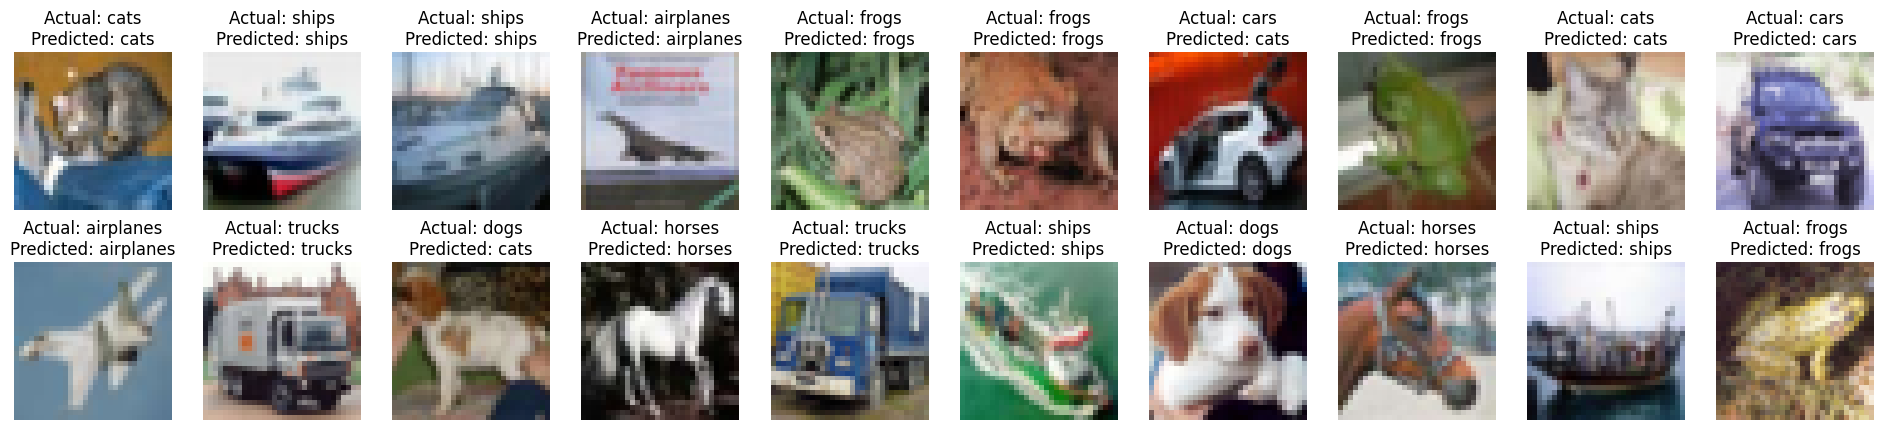

In [10]:
# Make predictions on the test set, use the softmax layer to convert the logits to probabilities
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(x_test)

# Plot the first 20 prediction image and its label, and the predicted label
plt.figure(figsize=(24, 5))
for i in range(20):
    plt.subplot(2, 10, i+1)
    plt.imshow(x_test[i])
    plt.title(f'Actual: {class_names[y_test[i, 0]]}\nPredicted: {class_names[np.argmax(predictions[i])]}')
    plt.axis("off")
plt.show()